In [2]:
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas
import numpy as np
from scipy import stats
import re
%matplotlib inline

In [6]:
#import csv file
data_df = pandas.read_csv('data.csv').dropna()
#Convert to a new csv file without quotes
data_df.to_csv('new_data.csv', index=False, delimiter=',', na_rep='NaN')
df = pandas.read_csv('new_data.csv')
#print data_df

In [3]:
#Check the headers of the columns and locate date
#print(df)
print(df.loc[df['date'] == '2013-06-01'])
#print data_df.dropna()

           date  orders circumstance  drivers_available
497  2013-06-01   29012          dry               6214


# Evolution of the orders with date

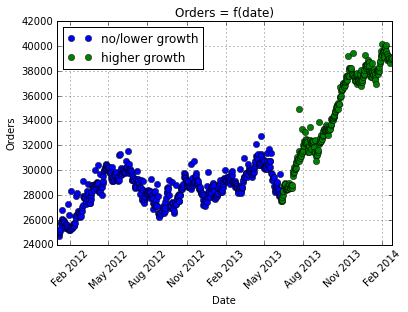

In [4]:
# Transform the dates for matplotlib
date_total = mdates.datestr2num(df['date'].tolist())
#region of no/lower growth
fig=plt.plot_date(x = date_total[:505], y=df['orders'][:505], label = 'no/lower growth')
#region of higher growth
fig=plt.plot_date(x = date_total[505:], y=df['orders'][505:], label = 'higher growth')
plt.ylabel("Orders")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Orders = f(date)')
plt.legend(loc='upper left');
plt.show()

# 

# Drivers vs days

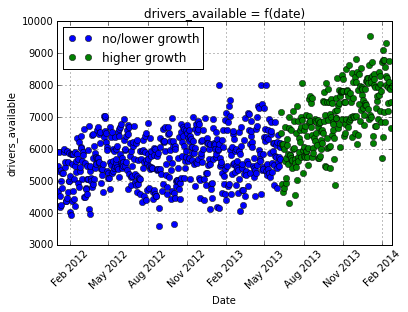

In [5]:
#region of no/low growth 
plt.plot_date(date_total[:505], df['drivers_available'][:505], label = 'no/lower growth')
#region of higher growth
plt.plot_date(date_total[505:], df['drivers_available'][505:], label = 'higher growth')
plt.ylabel("drivers_available")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.title('drivers_available = f(date)')
plt.legend(loc='upper left');
plt.show()

# Orders vs Drivers

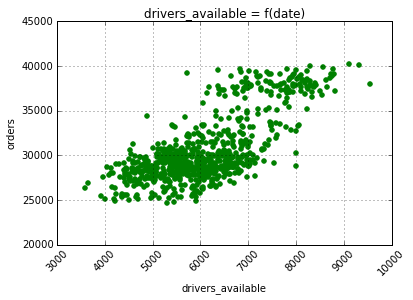

In [6]:
fig=plt.scatter(df['drivers_available'], df['orders'], color = 'g')
plt.ylabel("orders")
plt.xlabel("drivers_available")
plt.xticks(rotation=45)
plt.grid(True)
plt.title('drivers_available = f(date)')
plt.show()

# Orders vs circumstance

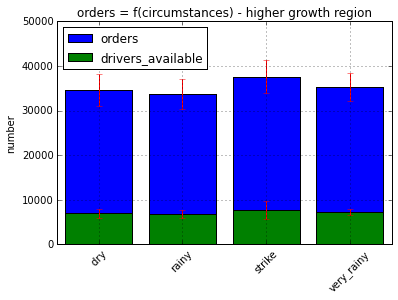

In [7]:
#Lowercase diferent circumstances
df.circumstance = df.circumstance.str.lower()
#dr will be replaced by dry, because it is a spelling error.
df=df.replace('dr','dry')
#Count how many orders existed for different circumstances
a = df.groupby('circumstance').orders.nunique()
# sum order for different circumstance tags
b = df.groupby("circumstance").orders.sum()
# calculate mean orders for different circumstance tags. The [:] is to select the desired regions
c = df[505:].groupby("circumstance").orders.mean()
# calculate standard deviation orders for different circumstance tags. The [:] is to select the desired regions
d = df[505:].groupby("circumstance").orders.std()
# calculate mean drivers_available for different circumstance tags. The [:] is to select the desired regions
e = df[505:].groupby("circumstance").drivers_available.mean()
# calculate standard deviation drivers_available for different circumstance tags. The [:] is to select the desired regions
f = df[505:].groupby("circumstance").drivers_available.std()

#create a list with all the labels.
mean_circumstance_order = []
std_circumstance_order = []
mean_circumstance_drivers_available = []
std_circumstance_drivers_available = []
#create two lists: one for the mean and the other for the standard deviation.
for i in range(0,len(a+1)):
        mean_circumstance_order.append(c[i])
        std_circumstance_order.append(d[i])
        mean_circumstance_drivers_available.append(e[i])
        std_circumstance_drivers_available.append(f[i])

# Number of days for each circumstance
DayOfWeekOfCall = [1,2,3,4]
LABELS = ["dry ", "rainy", "strike","very_rainy"]
plt.bar(DayOfWeekOfCall,  mean_circumstance_order, yerr=std_circumstance_order, ecolor='r', align='center', label='orders')
plt.bar(DayOfWeekOfCall,  mean_circumstance_drivers_available, yerr=std_circumstance_drivers_available, color='g', ecolor='r', align='center',label='drivers_available')
plt.legend(loc='upper left');
plt.ylabel("number")
plt.ylim((0,50000))
plt.grid(True)
plt.title('orders = f(circumstances) - higher growth region')
plt.xticks(DayOfWeekOfCall, LABELS, rotation=45)
plt.show()

# Time evolution of each circumstance in an area plot

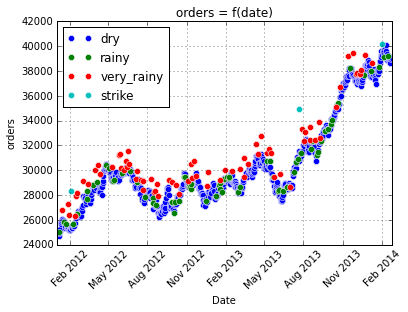

In [8]:
#Select the part of the dataframe that has the circumstance: dry, rainy, very_rainy or strike
df_dry = df[df.circumstance == "dry"]
df_rainy = df[df.circumstance == "rainy"]
df_very_rainy = df[df.circumstance == "very_rainy"]
df_strike = df[df.circumstance == "strike"]
# Transform the dates for matplotlib
dates_dry = mdates.datestr2num(df_dry['date'].tolist())
dates_rainy = mdates.datestr2num(df_rainy['date'].tolist())
dates_very_rainy = mdates.datestr2num(df_very_rainy['date'].tolist())
dates_strike = mdates.datestr2num(df_strike['date'].tolist())
#Plotting of orders vs (dry, rainy, very_rainy or strike)
plt.plot_date(dates_dry, df_dry['orders'], label='dry', markersize = 6, markeredgecolor = 'w')
plt.plot_date(dates_rainy, df_rainy['orders'], label='rainy', markersize = 6, markeredgecolor = 'w')
plt.plot_date(dates_very_rainy, df_very_rainy['orders'], label='very_rainy', markersize = 6, markeredgecolor = 'w')
plt.plot_date(dates_strike, df_strike['orders'], label='strike', markersize = 6, markeredgecolor = 'w')
plt.ylabel("orders")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.title('orders = f(date)')
plt.legend(loc='upper left');
plt.show()


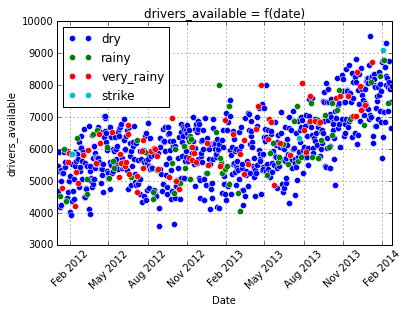

In [9]:
#Plotting of orders vs (dry, rainy, very_rainy or strike)
plt.plot_date(dates_dry, df_dry['drivers_available'], label='dry', markersize = 6, markeredgecolor = 'w')
plt.plot_date(dates_rainy, df_rainy['drivers_available'], label='rainy', markersize = 6, markeredgecolor = 'w')
plt.plot_date(dates_very_rainy, df_very_rainy['drivers_available'], label='very_rainy', markersize = 6, markeredgecolor = 'w')
plt.plot_date(dates_strike, df_strike['drivers_available'], label='strike', markersize = 6, markeredgecolor = 'w')
plt.ylabel("drivers_available")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.title('drivers_available = f(date)')
plt.legend(loc='upper left');
plt.show()

In [10]:
df_dry_rainy = df[(df.circumstance == "dry") | (df.circumstance == "rainy")] 

## Linear regression for the higher growth region (as in the first fig.). Dry and rainy days

In [11]:
dates_h_dr = mdates.datestr2num(df_dry_rainy['date'][497:].reset_index(drop = True).tolist())
order_h_dr = df_dry_rainy['orders'][497:].reset_index(drop = True).tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(dates_h_dr, order_h_dr)
print "Regression: date vs order - ", slope, intercept, r_value**2, p_value, std_err

Regression: date vs order -  42.1701013274 -30966928.1562 0.893087477581 8.39182502454e-90 1.08450771334


In [12]:
drivers_available_h_dr = df_dry_rainy['drivers_available'][497:].reset_index(drop = True).tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(dates_h_dr, drivers_available_h_dr)
print "Regression: date vs drivers_available - ", slope, intercept, r_value**2, p_value, std_err

Regression: date vs drivers_available -  8.37103621672 -6147059.65416 0.318679999922 8.59342660874e-17 0.909783588041


## Linear regression for the no/lower growth region (as in the first fig.). Dry and rainy days

In [13]:
dates_l_dr = mdates.datestr2num(df_dry_rainy['date'][:497].reset_index(drop = True).tolist())
order_l_dr = df_dry_rainy['orders'][:497].reset_index(drop = True).tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(dates_l_dr, order_l_dr)
print "Regression: date vs order - ", slope, intercept, r_value**2, p_value, std_err

Regression: date vs order -  4.52299742024 -3294942.8966 0.28918766792 1.35225093472e-38 0.318721479699


In [14]:
drivers_available_l_dr = df_dry_rainy['drivers_available'][:497].reset_index(drop = True).tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(dates_l_dr, drivers_available_l_dr)
print "Regression: date vs drivers_available - ", slope, intercept, r_value**2, p_value, std_err

Regression: date vs drivers_available -  1.0233639927 -746279.424591 0.0491691186378 5.93777652498e-07 0.202270691933


## Linear regression for the higher growth region (as in the first fig.) Very_rainy days

In [15]:
dates_h_vr = mdates.datestr2num(df_very_rainy['date'][55:].reset_index(drop = True).tolist())
order_h_vr = df_very_rainy['orders'][55:].reset_index(drop = True).tolist()

slope, intercept, r_value, p_value, std_err = stats.linregress(dates_h_vr, order_h_vr)
print "Regression: date vs orders - ", slope, intercept, r_value**2, p_value, std_err

Regression: date vs orders -  48.4863184041 -35609345.0839 0.903794237101 1.37014147173e-10 3.72862508113


## Linear regression for the no/lower growth region (as in the first fig.) Very_rainy days

In [16]:
dates_l_vr = mdates.datestr2num(df_very_rainy['date'][:55].reset_index(drop = True).tolist())
order_l_vr = df_very_rainy['orders'][:55].reset_index(drop = True).tolist()

slope, intercept, r_value, p_value, std_err = stats.linregress(dates_l_vr, order_l_vr)
print "Regression: date vs orders - ", slope, intercept, r_value**2, p_value, std_err

Regression: date vs orders -  5.1223975771 -3734101.46732 0.300153442657 1.49564142886e-05 1.0743977729
